#Import and Basic Settings

In [59]:
import os as os
os.getcwd()


'/Users/mario/Documents/Github/Education.ai/Education.ai/notebooks'

*Analyse the metrics described in the paper*
- Total funding
- No. of Employees
- Description
- Classification (incl. self-declared)
- Age [extract date - funding date]

In [60]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
'''
#mount google drive
from google.colab import drive
drive.mount('1LbVccBPxo8pR9C41wosD5qYOglKsDrPr')
'''

"\n#mount google drive\nfrom google.colab import drive\ndrive.mount('1LbVccBPxo8pR9C41wosD5qYOglKsDrPr')\n"

In [62]:
#import processed dataset
df = pd.read_csv("//Users/mario/Documents/Github/Education.ai/data/2022-12-31_EdTech dataset_processed.csv", index_col=0)

/var/folders/sv/wh2gxdqd7l7g9jyshkbzflxr0000gn/T/ipykernel_14444/2151554003.py:2: DtypeWarning: Columns (78,104,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("//Users/mario/Documents/Github/Education.ai/data/2022-12-31_EdTech dataset_processed.csv", index_col=0)


In [63]:
#basic setting for plot layout
sns.set_theme(style= 'darkgrid' )#"whitegrid")
plt.rcParams.update({'font.size': 22})
my_colors = 'Set1' #'flag' #'brg'   #'BrBG_r' # "ch:r=-.2,d=.3_r" 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14046 entries, 0 to 14045
Columns: 125 entries, Organization Name to Class
dtypes: bool(1), float64(36), int64(4), object(84)
memory usage: 13.4+ MB


In [65]:
for i in df.columns: print(i)

Organization Name
Organization Name URL
Founded Date
Founded Date Precision
Industries
Headquarters Location
Description
CB Rank (Company)
Estimated Revenue Range
Operating Status
Exit Date
Exit Date Precision
Closed Date
Closed Date Precision
Company Type
Website
Twitter
LinkedIn
Full Description
Facebook
Headquarters Regions
Investment Stage
Investor Type
Number of Portfolio Organizations
Number of Investments
Number of Lead Investments
Number of Diversity Investments
Number of Exits
Number of Exits (IPO)
Accelerator Program Type
Accelerator Application Deadline
Accelerator Duration (in weeks)
School Type
School Program
Number of Enrollments
School Method
Number of Founders (Alumni)
Industry Groups
Number of Founders
Founders
Number of Employees
Number of Funding Rounds
Funding Status
Last Funding Date
Last Funding Amount
Last Funding Amount Currency
Last Funding Amount Currency (in USD)
Last Funding Type
Last Equity Funding Amount
Last Equity Funding Amount Currency
Last Equity Fund

In [66]:
df['Total Funding Amount Currency (in USD)'].mean()

16354647.550672183

#Formating Data for Analysis

In [67]:
#rename columns to be more descriptive
df = df.rename(columns={'Name': 'Topic Name'})

In [68]:
#defining age calculation
from datetime import date

cut_off = date(2022, 12, 31)

def calculateAge(x):
    t0 = cut_off
    age = t0.year - x.year -((t0.month, t0.day) <
         (x.month, x.day))

    return age

In [69]:
#define a age calculation with a continous value
def calculateAgeDays(x):
  t0 = cut_off
  age = sum([(t0.year- x.year) * 365.25, (t0.month - x.month) * 30, (t0.day - x.day)])

  return age

In [70]:
#converting str in 'Founded Date' to datetime format
from pandas.core.reshape.tile import to_datetime
df['Founded Date'] = to_datetime(df['Founded Date'])

/var/folders/sv/wh2gxdqd7l7g9jyshkbzflxr0000gn/T/ipykernel_14444/1797541815.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Founded Date'] = to_datetime(df['Founded Date'])


In [71]:
#generating 'Age' col from 'Founded Date' col
df['Age in Years'] = df.apply(lambda row : calculateAge(row['Founded Date']), axis = 1)

In [72]:
#generating 'Age in Days' col from 'Founded Date' col
df['Age in Days'] = df.apply(lambda row : calculateAgeDays(row['Founded Date']), axis = 1)

In [73]:
#converting classification outcome to boolean valuables
df['Class'] = df['Class'].astype(bool)

In [74]:
#split the location cell into actionable parts
df[['City','Country']]  = df['Headquarters Location'].str.rsplit(r",", n=1, expand=True)

In [75]:
#The 'Industries' field offers companies/ data curators the option to specify AI in a profile, extract boolean value for said field
df['Class self-identified'] = df['Industries'].str.contains('Artificial Intelligence', regex= False)

In [76]:
#define a function to turn numbers wrongfully identified as dates back into the classification buckets
def emp_corr(var):
  i = str(var)
  if i == '01.Oct':
    return '1-10'
  elif i =='Nov.50':
    return '11-50'
  else:
    return var

In [77]:
#apply the above function to the 'Number of Employees' column
df['Number of Employees'] = df.apply(lambda row : emp_corr(row['Number of Employees']), axis = 1)

#Origin Country of Ventures
Check if findings of Dalle et al. (2017) hold true for the dataset
- mostly US-based *(how is it worded exactlly? majority or just biggest part?)*



In [78]:
#count the values for Countries
countries = df['Country'].value_counts()

In [79]:
#print top 10 countries of origin (overview as appendix)
countries[:10]

Country
 United States      6405
 India              1951
 United Kingdom     1231
 France              357
 Germany             342
 Spain               327
 China               314
 Israel              218
 Switzerland         192
 The Netherlands     190
Name: count, dtype: int64

In [80]:
#reshape 'countries Series' for better visibility in the plot
#the top 10
countries_plt= countries[:10].copy()

#append 'others' category
others = pd.Series({' Others' : countries[10:].sum()})
countries_plt = pd.concat([countries_plt,(others)])

#add column names
countries_plt = pd.DataFrame(countries_plt, copy = True, columns = ['# Ventures'])
countries_plt = countries_plt.reset_index(names='Country')

In [81]:
#insert a column with the ISO 3166 Alpha-3 code for country names to increase readability
countries_plt['Origin'] = ['USA', 'IND', 'GBR', 'FRA','DEU', 'ESP', 'CHN','ISR', 'CHE', 'NLD','others']

In [82]:
#calculate the sample size
countries_plt['# Ventures'].sum()

14004

/var/folders/sv/wh2gxdqd7l7g9jyshkbzflxr0000gn/T/ipykernel_14444/1470902161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Origin' , y = '# Ventures', data = countries_plt, palette= my_colors,)


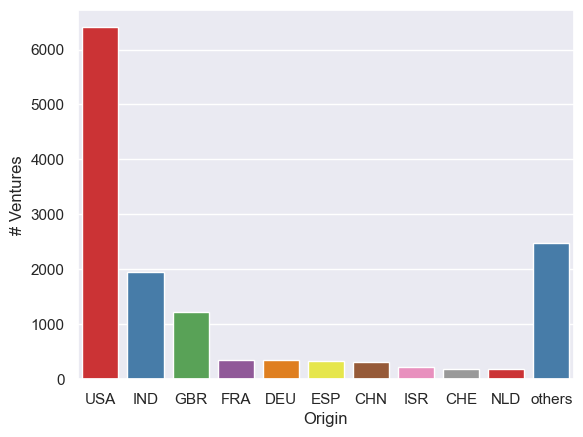

In [83]:
# bar plot
sns.barplot(x = 'Origin' , y = '# Ventures', data = countries_plt, palette= my_colors,)
plt.show()

Note: the assumption found in theory seems to hold true

#Size of Ventures
- mostly small (<50 FTE) firms in sample.

In [84]:
#count the values for small firms
size = df['Number of Employees'].value_counts()

In [85]:
size

Number of Employees
1-10          6987
11-50         4619
51-100         720
101-250        483
251-500        217
501-1000       103
1001-5000       71
10001+          32
5001-10000      16
Name: count, dtype: int64

In [86]:
#calculate the sample size
size.sum()

13248

In [87]:
#calculate percentage of ventures with less than 50 employees
(size['1-10']+ size['11-50'])/size.sum()

0.8760567632850241

#Survival Rate of Ventures

In [88]:
#Import .xlsx with Data from Statista
df_sr = pd.read_excel("/Users/mario/Documents/Github/Education.ai/data/survival-rates.xlsx",
                    sheet_name = 0)

In [89]:
df_sr['Sample Count'] = df['Age in Years'].value_counts()

In [90]:
survivors = df[df['Operating Status']== 'Active']
df_sr['Sample Survivors'] = survivors['Age in Years'].value_counts()

In [91]:
#calculate the survival rate
df_sr['Sample'] = (df_sr['Sample Survivors'] / df_sr['Sample Count']) * 100

Text(0.5, 0, 'Age in Years')

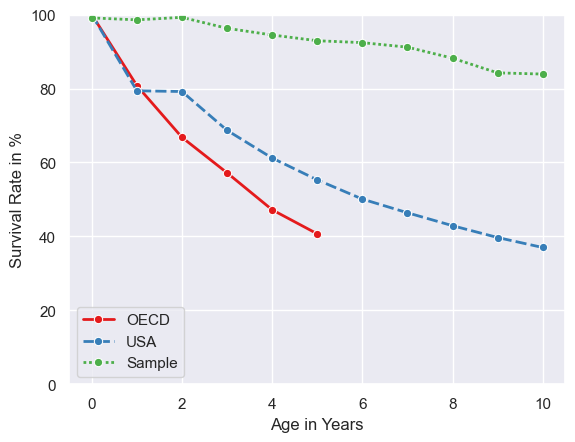

In [92]:
sr_plt = sns.lineplot(data = df_sr[['OECD','USA','Sample']],
                      palette = my_colors,
                      linewidth = 2,
                      marker='o',
                      linestyle= '--')
sr_plt.set_ylim(0, 100)
sr_plt.set_ylabel('Survival Rate in %')
sr_plt.set_xlabel('Age in Years')

Note: OECD values are older; the US rates show the 'Corona-Freeze' in bankrupcy observed also in other economies

Furthermore, bias identified (survivor/ "publsihing bias" ) in Retterath & Braun 2020

#Topic Model (Unsupervised Learning)

In [93]:
df['Topic Name'].value_counts()

Topic Name
-1_learning_students_platform_education       8352
0_children_kids_parents_games                  698
1_entrepreneurs_startup_startups_business      589
2_college_students_universities_university     435
3_services_solutions_development_business      375
4_language_english_learning_languages          370
5_sports_fitness_athletes_coaches              332
6_career_job_talent_candidates                 258
7_coding_code_programming_learn                244
8_books_reading_book_readers                   213
9_reality_vr_virtual_ar                        210
10_education_students_online_educational       202
11_financial_loan_money_loans                  195
12_medical_healthcare_health_medicine          181
13_tutors_tutoring_tutor_students              171
14_video_users_content_videos                  168
15_writing_writers_essay_assignment            166
16_school_academy_education_schools            147
17_learning_teachers_students_data             143
18_education_chinese

In [150]:
#top10 best funded ventures ("fund returners")
top10 = df['Total Funding Amount Currency (in USD)'].nlargest(10).index.to_list()
top10_extract = df.loc[top10]
top10_sorted = top10_extract[['Organization Name', 'Topic Name','Total Funding Amount Currency (in USD)']].sort_values('Total Funding Amount Currency (in USD)',ascending= False)

In [151]:
top10_sorted

,Organization Name,Topic Name,Total Funding Amount Currency (in USD)
10676,BYJU’S,-1_learning_students_platform_education,6.987658e+09
11007,Yuanfudao,18_education_chinese_china_beijing,4.052000e+09
11663,Zuoyebang,18_education_chinese_china_beijing,2.935000e+09
2354,CommonBond,11_financial_loan_money_loans,1.559106e+09
10544,Eruditus Executive Education,-1_learning_students_platform_education,1.163986e+09
11368,VIPKID,-1_learning_students_platform_education,1.055077e+09
12042,Emeritus,-1_learning_students_platform_education,1.040000e+09
10546,Zhangmen,18_education_chinese_china_beijing,9.022773e+08
11317,DaDa,18_education_chinese_china_beijing,8.638673e+08
12044,Unacademy,-1_learning_students_platform_education,8.385000e+08


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'BYJU’S'),
  Text(1, 0, 'Yuanfudao'),
  Text(2, 0, 'Zuoyebang'),
  Text(3, 0, 'CommonBond'),
  Text(4, 0, 'Eruditus Executive Education'),
  Text(5, 0, 'VIPKID'),
  Text(6, 0, 'Emeritus'),
  Text(7, 0, 'Zhangmen'),
  Text(8, 0, 'DaDa'),
  Text(9, 0, 'Unacademy')])

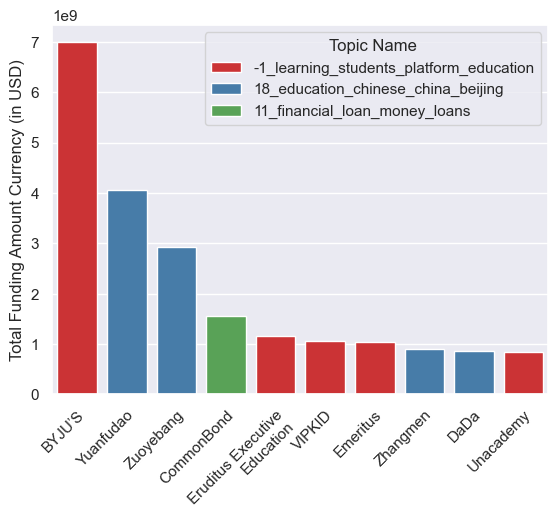

In [152]:
sns.barplot(data = top10_sorted, x= 'Organization Name', y= 'Total Funding Amount Currency (in USD)', hue= 'Topic Name', palette=my_colors)
plt.xticks(rotation = 45, wrap = True, ha = 'right')

8352 entries could not be fitted into a categorie of more than 100 entries. Topic '-1' is thus dropped from the analysis. See BERTopic documentation.

In [95]:
#Exclude Topic '-1' from analysis
topic_df = df[df['Topic']!= -1]

In [96]:
x = topic_df[['Topic Name', 'Total Funding Amount Currency (in USD)']].groupby('Topic Name').mean()
x = x.sort_values(by= ['Total Funding Amount Currency (in USD)'], ascending= False)
print(x)

                                            Total Funding Amount Currency (in USD)
Topic Name                                                                        
18_education_chinese_china_beijing                                    1.868380e+08
11_financial_loan_money_loans                                         4.046202e+07
16_school_academy_education_schools                                   3.907554e+07
22_security_cyber_cybersecurity_services                              1.898600e+07
7_coding_code_programming_learn                                       1.263014e+07
5_sports_fitness_athletes_coaches                                     1.233157e+07
17_learning_teachers_students_data                                    1.112621e+07
4_language_english_learning_languages                                 8.411668e+06
12_medical_healthcare_health_medicine                                 7.869882e+06
19_training_sap_software_courses                                      7.656393e+06
20_t

/var/folders/sv/wh2gxdqd7l7g9jyshkbzflxr0000gn/T/ipykernel_14444/1473611591.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = x, x= 'Topic Name', y= 'Total Funding Amount Currency (in USD)', palette=my_colors)


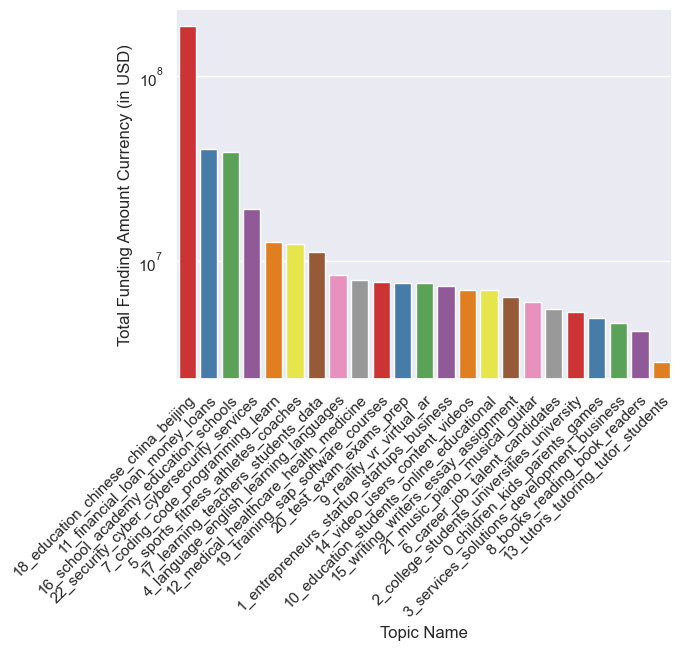

In [97]:
sns.barplot(data = x, x= 'Topic Name', y= 'Total Funding Amount Currency (in USD)', palette=my_colors)
plt.xticks(rotation = 45, wrap = True, ha = 'right')
plt.yscale('log')

<Figure size 640x480 with 0 Axes>

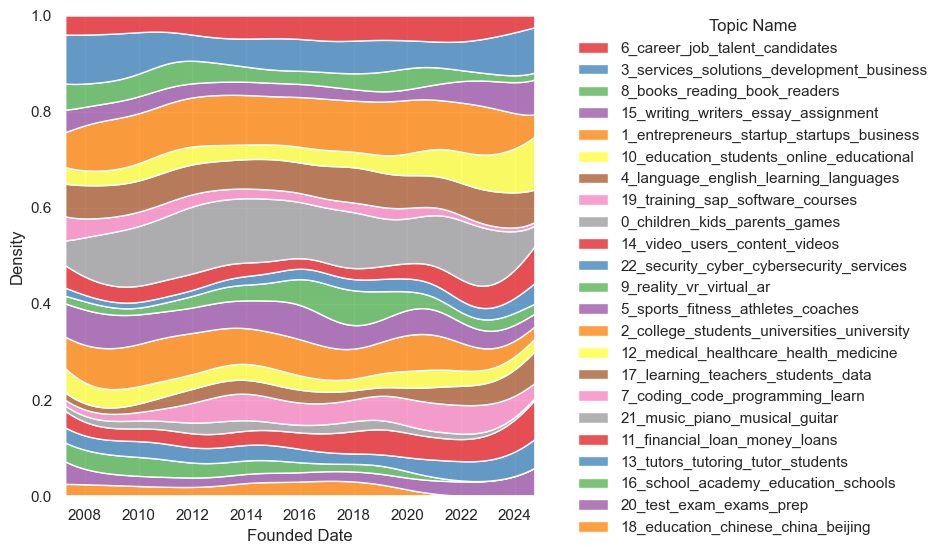

In [98]:

sns.despine(left=True, bottom=True)

sns.displot(
    data=topic_df,
    x='Founded Date' ,#'Age in Days',#"Age"
    hue="Topic Name",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette= my_colors,
)

Topics worth investigating:
Expansion in 10, 15, 17
Decreased interest in 8, 9
Complete drop-off in 16, 18, 19

*Notes, possible Explanations:*

8: Books -> market saturation, shrinking, unatractive market?

9: VR -> META effect? resp. market trend influencing META

10: online education -> Coronoa Boom

15: writing -> LLM integrations -> possible AI link

16: -> moves with 18, same explanation?

17: -> follows 10, learning moved online, better data availabillity 

18: China banned education apps

19: Software training -> Market saturation?

Thus seems to rather follow macro-trends, than technological topics

In [99]:
rep_doc = df[df['Representative_document']== True]

In [100]:
#create an export with the relevant columns to add as an appendix, showing the comapny name, the original description, the assigned topic and representative words
topic_export = (rep_doc[['Organization Name','Full Description','Topic Name', 'Top_n_words']])
topic_export.to_csv('//Users/mario/Documents/Github/Education.ai/data/topic_model_exports.csv')

#subsampling T18/T16

In [101]:
df_t18 = df[df['Topic Name'] == '18_education_chinese_china_beijing']

In [102]:
df_t18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 649 to 13496
Columns: 130 entries, Organization Name to Class self-identified
dtypes: bool(3), datetime64[ns](1), float64(37), int64(4), object(85)
memory usage: 137.4+ KB


In [103]:
df_t18['Country'].value_counts()

Country
 China                   103
 United States            11
 United Kingdom            6
 Taiwan                    3
 France                    2
 South Korea               2
 Hong Kong                 2
 India                     2
 Ireland                   1
 Singapore                 1
 Vietnam                   1
 Japan                     1
 Israel                    1
 United Arab Emirates      1
Name: count, dtype: int64

In [104]:
df_t16 = df[df['Topic Name'] == '16_school_academy_education_schools']

In [105]:
df_t16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 305 to 12552
Columns: 130 entries, Organization Name to Class self-identified
dtypes: bool(3), datetime64[ns](1), float64(37), int64(4), object(85)
memory usage: 147.4+ KB


In [106]:
df_t16['Country'].value_counts()

Country
 United States      101
 United Kingdom      25
 India                4
 France               3
 Spain                2
 Malaysia             2
 Vietnam              2
 Singapore            2
 Germany              1
 Switzerland          1
 The Netherlands      1
 Saudi Arabia         1
 Philippines          1
 China                1
Name: count, dtype: int64

The overlap is either coincidental or the ventures served china from outside the country.

#Subsampling '15_writing_writers_essay_assignment' after 2020-12-31
given the insights above subsampling topic 15 seems promising, as it appears to be a proxy for LLMs

In [107]:
sub_df = df[df['Founded Date'] > '2020-12-31']

In [108]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 10095 to 14045
Columns: 130 entries, Organization Name to Class self-identified
dtypes: bool(3), datetime64[ns](1), float64(37), int64(4), object(85)
memory usage: 512.5+ KB


In [109]:
sub_df[['Topic Name','Class self-identified']].groupby('Topic Name').value_counts()

Topic Name                                  Class self-identified
-1_learning_students_platform_education     False                    302
                                            True                      32
0_children_kids_parents_games               False                     22
                                            True                       1
10_education_students_online_educational    False                     11
                                            True                       1
11_financial_loan_money_loans               False                      9
12_medical_healthcare_health_medicine       False                      4
13_tutors_tutoring_tutor_students           False                      7
14_video_users_content_videos               False                      8
15_writing_writers_essay_assignment         False                      9
17_learning_teachers_students_data          False                      8
19_training_sap_software_courses            False         

In [110]:
sub_df[['Topic Name','Class']].groupby('Topic Name').value_counts()

Topic Name                                  Class
-1_learning_students_platform_education     False    312
                                            True      22
0_children_kids_parents_games               False     20
                                            True       3
10_education_students_online_educational    False     12
11_financial_loan_money_loans               False      7
                                            True       2
12_medical_healthcare_health_medicine       False      4
13_tutors_tutoring_tutor_students           False      6
                                            True       1
14_video_users_content_videos               False      6
                                            True       2
15_writing_writers_essay_assignment         False      7
                                            True       2
17_learning_teachers_students_data          False      8
19_training_sap_software_courses            False      1
1_entrepreneurs_startup_startups_busin

In [111]:
a = sub_df[sub_df['Topic Name'] == '15_writing_writers_essay_assignment' ]
b = sub_df[sub_df['Topic Name'] != '15_writing_writers_essay_assignment' ]

In [112]:
a.info()
print('-----------')
b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 10137 to 14020
Columns: 130 entries, Organization Name to Class self-identified
dtypes: bool(3), datetime64[ns](1), float64(37), int64(4), object(85)
memory usage: 9.0+ KB
-----------
<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 10095 to 14045
Columns: 130 entries, Organization Name to Class self-identified
dtypes: bool(3), datetime64[ns](1), float64(37), int64(4), object(85)
memory usage: 503.5+ KB


In [113]:
a['Total Funding Amount Currency (in USD)'].mean()

24182.0

In [114]:
b['Total Funding Amount Currency (in USD)'].mean()

1191062.6952380952

In [115]:
s =sub_df[['Topic Name', 'Total Funding Amount Currency (in USD)']].groupby('Topic Name').mean()
s = s.sort_values(by= ['Total Funding Amount Currency (in USD)'], ascending= False)
print(s)

                                            Total Funding Amount Currency (in USD)
Topic Name                                                                        
2_college_students_universities_university                            3.446905e+06
6_career_job_talent_candidates                                        2.760858e+06
-1_learning_students_platform_education                               1.432991e+06
1_entrepreneurs_startup_startups_business                             9.403960e+05
11_financial_loan_money_loans                                         6.614013e+05
5_sports_fitness_athletes_coaches                                     6.047153e+05
7_coding_code_programming_learn                                       5.525870e+05
14_video_users_content_videos                                         3.515485e+05
3_services_solutions_development_business                             3.203215e+05
0_children_kids_parents_games                                         1.953872e+05
4_la

/var/folders/sv/wh2gxdqd7l7g9jyshkbzflxr0000gn/T/ipykernel_14444/1247354701.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = s, x= 'Topic Name', y= 'Total Funding Amount Currency (in USD)', palette=my_colors)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, '2_college_students_universities_university'),
  Text(1, 0, '6_career_job_talent_candidates'),
  Text(2, 0, '-1_learning_students_platform_education'),
  Text(3, 0, '1_entrepreneurs_startup_startups_business'),
  Text(4, 0, '11_financial_loan_money_loans'),
  Text(5, 0, '5_sports_fitness_athletes_coaches'),
  Text(6, 0, '7_coding_code_programming_learn'),
  Text(7, 0, '14_video_users_content_videos'),
  Text(8, 0, '3_services_solutions_development_business'),
  Text(9, 0, '0_children_kids_parents_games'),
  Text(10, 0, '4_language_english_learning_languages'),
  Text(11, 0, '9_reality_vr_virtual_ar'),
  Text(12, 0, '17_learning_teachers_students_data'),
  Text(13, 0, '15_writing_writers_essay_assignment'),
  Text(14, 0, '21_music_piano_musical_guitar'),
  Text(15, 0, '10_education_students_online_educational'),
  Text(16, 0, '12_medical_healthcare_heal

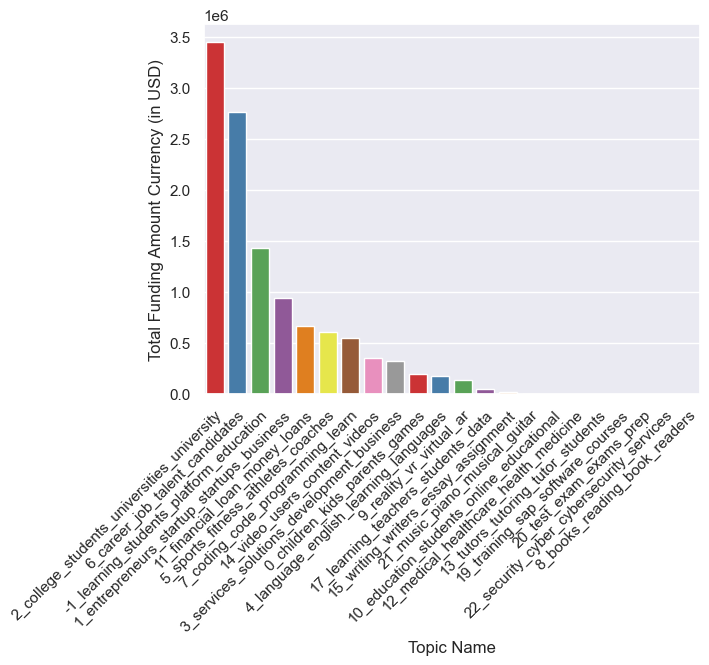

In [116]:
sns.barplot(data = s, x= 'Topic Name', y= 'Total Funding Amount Currency (in USD)', palette=my_colors)
plt.xticks(rotation = 45, wrap = True, ha = 'right')

#T9 VR

In [117]:
df[df['Topic Name']== '9_reality_vr_virtual_ar']['Total Funding Amount Currency (in USD)'].mean()

7531751.307692308

In [118]:
#split data into hype-phase 2015-12-31 to 2019-12-31
df_hype = df[df['Founded Date'] > '2015-12-31']
df_hype = df_hype[df_hype['Founded Date']< '2019-12-31']

In [119]:
#calculate the mean funding of VR during the hype phase
df_hype[df_hype['Topic Name']== '9_reality_vr_virtual_ar']['Total Funding Amount Currency (in USD)'].mean()

6572572.525

In [120]:
#calculate the mean funding for all other topics during the hype phase
df_hype[df_hype['Topic Name']!= '9_reality_vr_virtual_ar']['Total Funding Amount Currency (in USD)'].mean()

8564850.991485335

In [121]:
#create df for illustration
hot_df = pd.DataFrame({'Category': ['all VR ventures', 'VR ventures during hype-phase','other topics during hype-phase' ],
                       'Mean Total Funding': [7531751.307692308, 6572572.525,8564850.991485335]
})

/var/folders/sv/wh2gxdqd7l7g9jyshkbzflxr0000gn/T/ipykernel_14444/3102664829.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(


Text(0.5, 0, 'Subset')

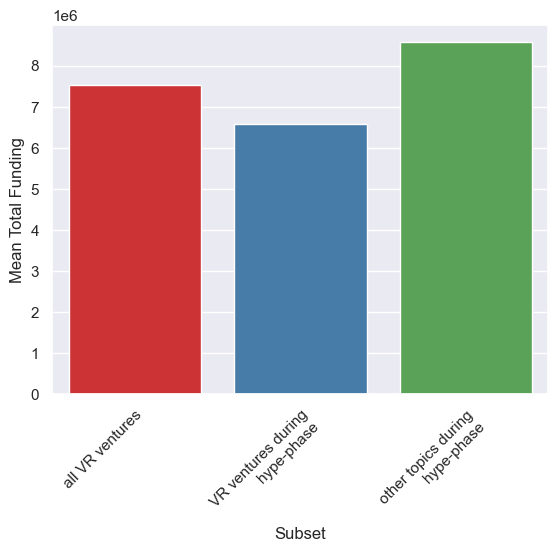

In [122]:
p = sns.barplot(
   data= hot_df,
   x= 'Category',
   y= 'Mean Total Funding',
   palette= my_colors)
plt.xticks(rotation = 45, wrap = True, ha = 'right')
p.set_xlabel('Subset')

#Classification

In [123]:
df['Class'].value_counts()

Class
False    12976
True      1070
Name: count, dtype: int64

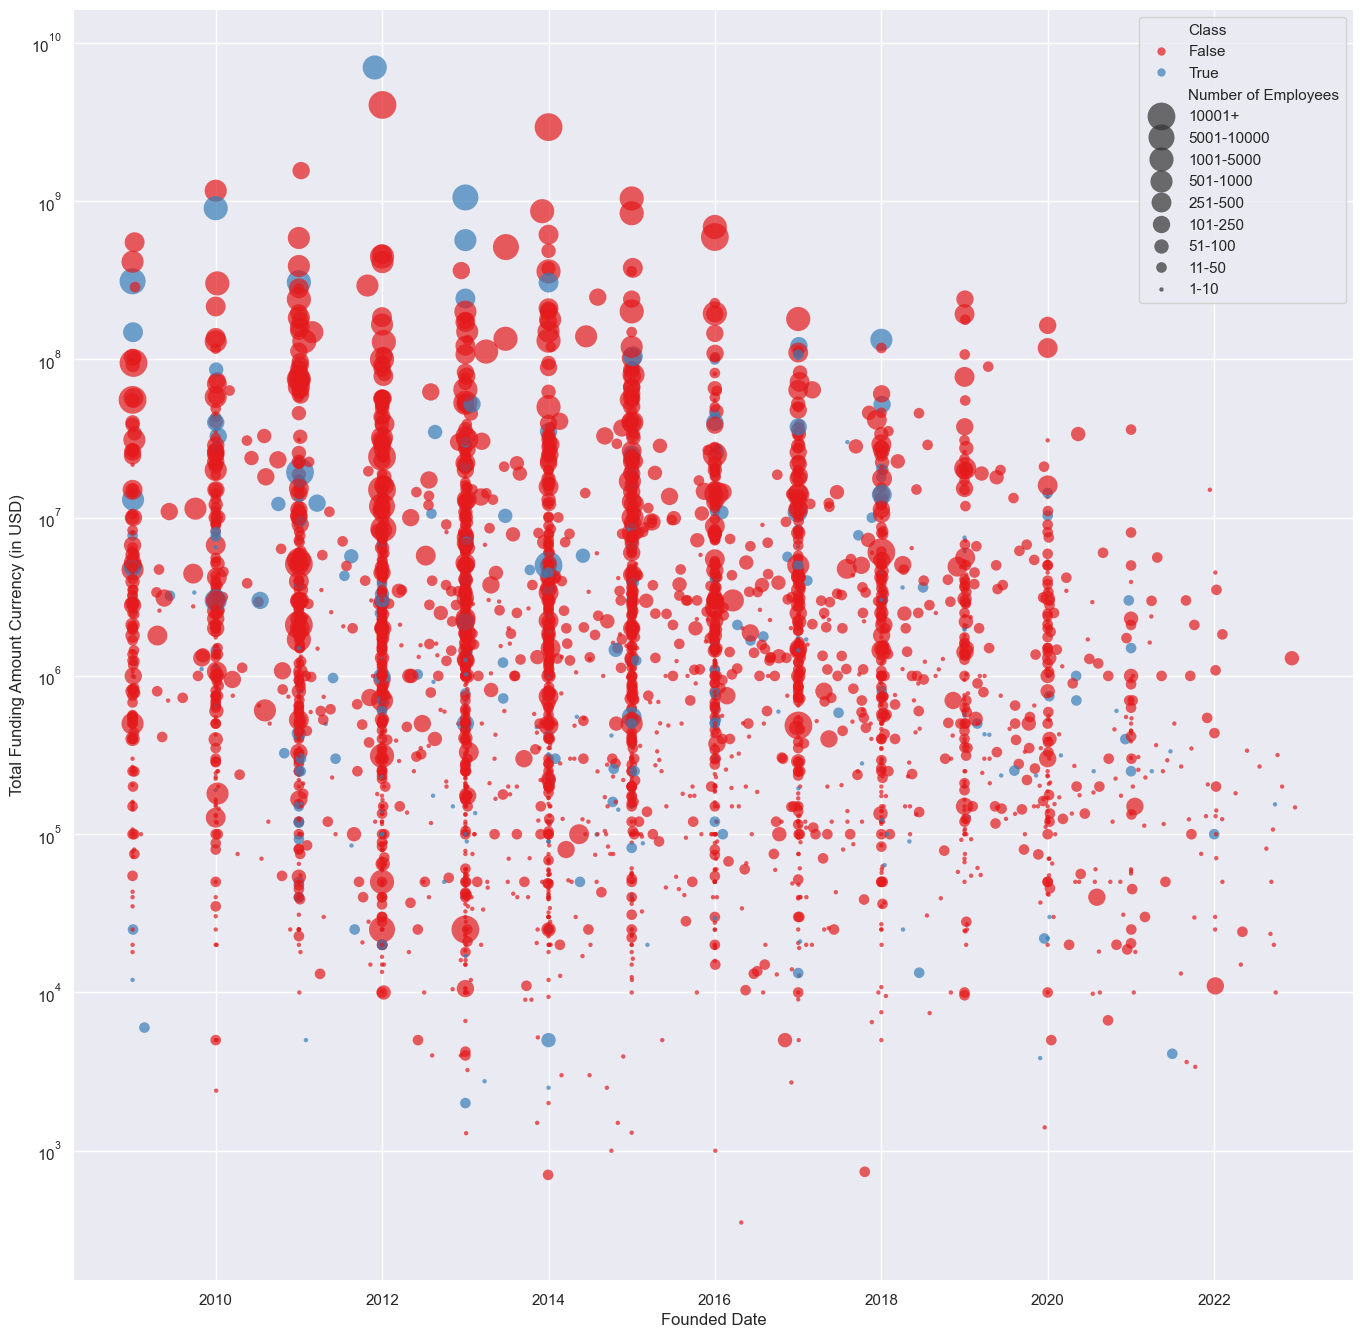

In [124]:
# Draw a scatter plot while assigning point colors and sizes to different variables in the dataset
f, ax = plt.subplots(figsize=(16.5, 16.5))
sns.despine(f, left=True, bottom=True)
#ai_binary = {0: 'non-AI', 1: 'AI'}
size_ranking = ['10001+','5001-10000','1001-5000' ,'501-1000','251-500','101-250','51-100','11-50','1-10']
sns.scatterplot(y="Total Funding Amount Currency (in USD)", x= 'Founded Date', #'Age in Days', #"Age"
                hue=  "Class",
                size="Number of Employees",
                palette= my_colors,
                #hue_order= ai_binary,
                size_order = size_ranking,
                sizes=(10, 400), linewidth=0,
                alpha=.7,
                data=df, ax=ax)
plt.yscale('log')

In [125]:
df['Class self-identified'].value_counts()

Class self-identified
False    13550
True       496
Name: count, dtype: int64

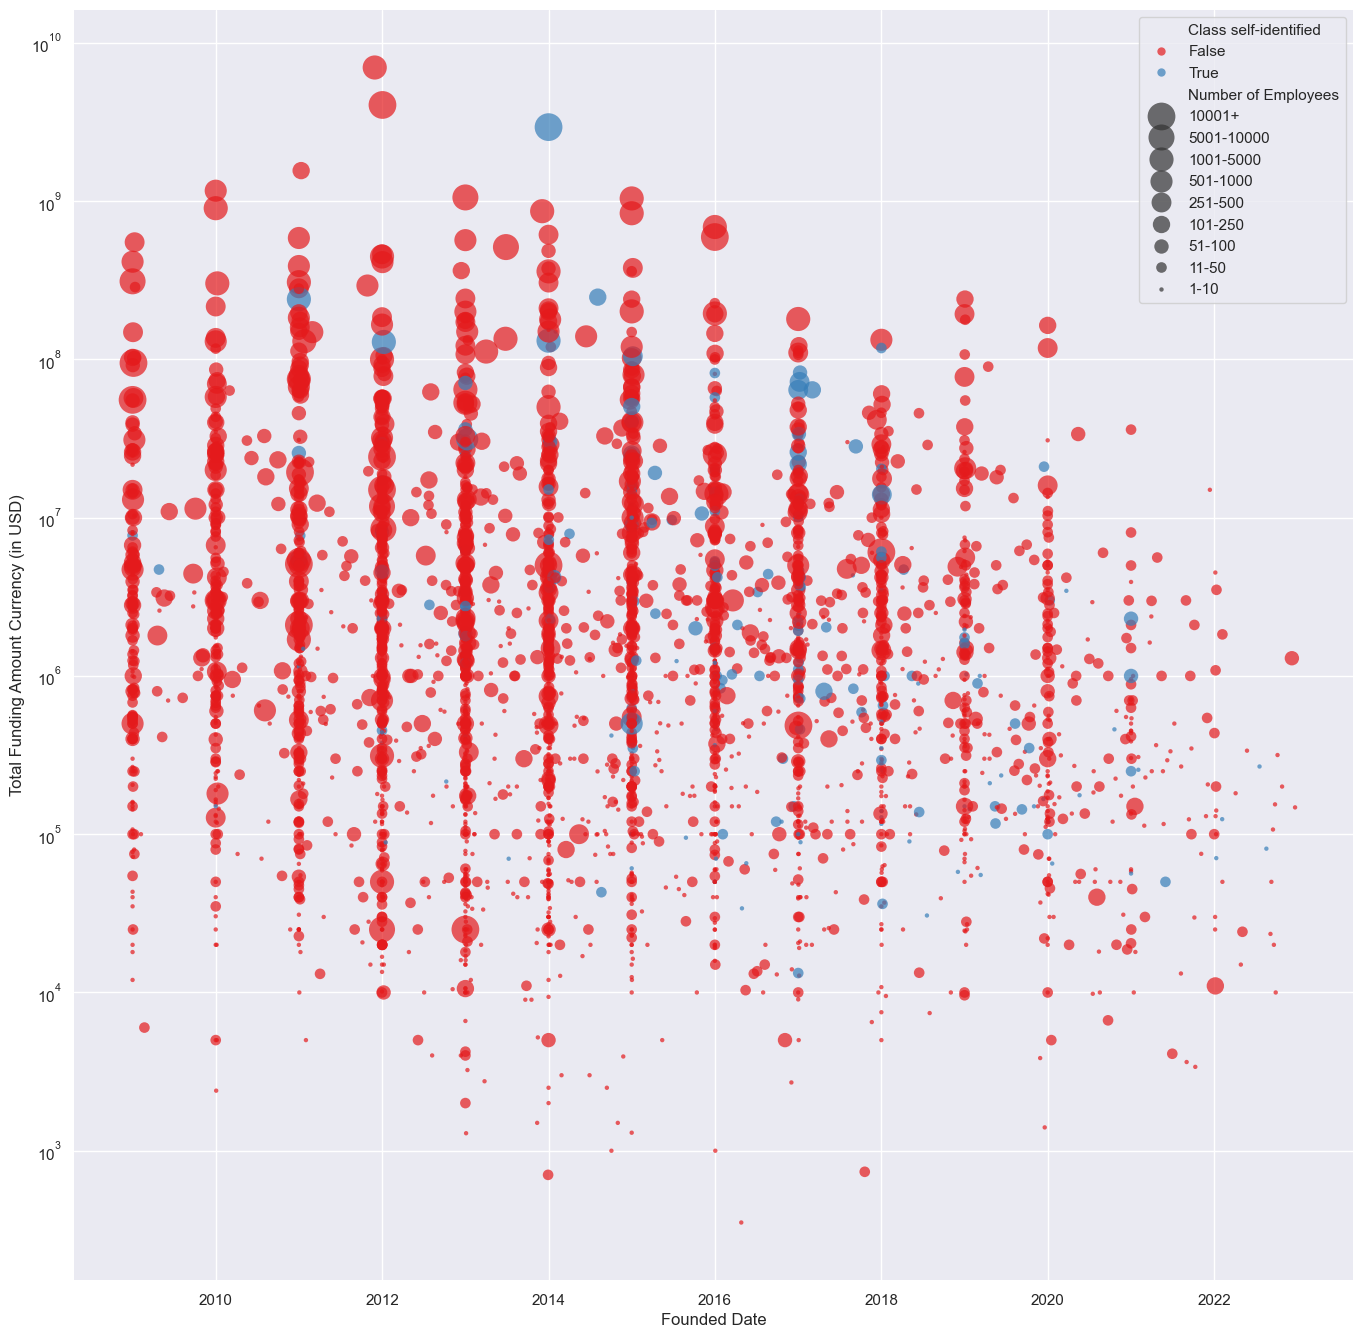

In [126]:
# Draw a scatter plot while assigning point colors and sizes to different variables in the dataset
f, ax = plt.subplots(figsize=(16.5, 16.5))
sns.despine(f, left=True, bottom=True)
#ai_binary = {0: 'non-AI', 1: 'AI'}
size_ranking = ['10001+','5001-10000','1001-5000' ,'501-1000','251-500','101-250','51-100','11-50','1-10']
sns.scatterplot(y="Total Funding Amount Currency (in USD)", x= 'Founded Date', #'Age in Days', #"Age"
                hue= 'Class self-identified' ,  #"Class"
                size="Number of Employees",
                palette= my_colors,
                #hue_order= ai_binary,
                size_order = size_ranking,
                sizes=(10, 400), linewidth=0,
                alpha=.7,
                data=df, ax=ax)
plt.yscale('log')

Notes:
1. Data Quality: a lot of entry dates coincide with the new years, quality is improving
2. AI companies see to be spread out randomly
3. as expected big, well-funded orgs are older (top left) -> seems valid

In [127]:
#convert blue and red from 'Set11 to continous color scheme for heatmap/ corr matrix
# Define the RGB codes as hex strings
color1 = "#e41a1c" #red
color2 = "#377eb8" #blue


In [128]:
Set1_cmap = sns.light_palette(color= color2, as_cmap=True)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Total Funding Amount Currency (in USD)'),
  Text(0, 1.5, 'Class'),
  Text(0, 2.5, 'Class self-identified'),
  Text(0, 3.5, 'Topic')])

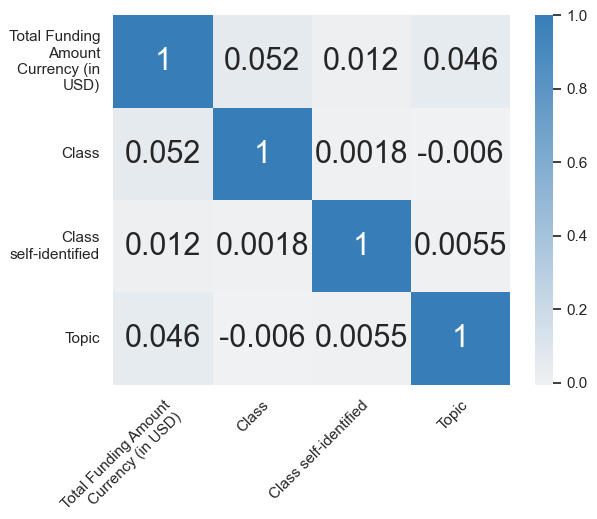

In [129]:
#checking for corellation between analysed var and Total Funding
sns.heatmap(df[['Total Funding Amount Currency (in USD)', 'Class', 'Class self-identified',  'Topic']].corr(), 
            annot= True,
            cmap = Set1_cmap
            )
plt.xticks(rotation = 45, wrap = True, ha = 'right')
plt.yticks(ha = 'right', wrap = True)

very low correlation for all analysed variables (Topic, AI, AI self-described)

These var do not correlate with successfull fundraising, the idea of Cooper et al. could not be replicated for the EdTech market